In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten


In [2]:
X_train=np.loadtxt('input.csv',delimiter=',')
Y_train=np.loadtxt('labels.csv',delimiter=',')

X_test=np.loadtxt('input_test.csv',delimiter=',')
Y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [3]:
X_train=X_train.reshape(len(X_train),100,100,3)   #Here we reshape the shape to 100 100 3 bcz the images in X_test and X_train are of 100x100 pixels and 3rgb
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)



X_train=X_train/255.0
Y_test=Y_test/255.0         #To reduce the values range from 0 to 255 to 0 to 1.
X_test=X_test/255.0
Y_test=Y_test/255.0

In [4]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)      
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


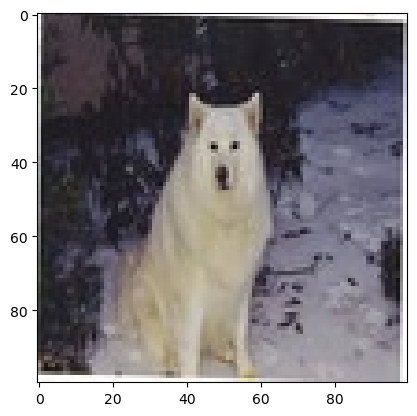

In [5]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])

In [6]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 6s 178ms/step - loss: 0.0874 - accuracy: 0.9785
Epoch 2/5
32/32 [==============================] - 6s 176ms/step - loss: 0.0664 - accuracy: 0.9890
Epoch 3/5
32/32 [==============================] - 6s 178ms/step - loss: 0.0553 - accuracy: 0.9890
Epoch 4/5
32/32 [==============================] - 6s 178ms/step - loss: 0.0403 - accuracy: 0.9935
Epoch 5/5
32/32 [==============================] - 7s 222ms/step - loss: 0.0292 - accuracy: 0.9960


In [64]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 29ms/step - loss: 3.0054 - accuracy: 0.2850


[3.005436420440674, 0.2849999964237213]

Predicting a new image from X_test

1/1 [==============================] - 0s 26ms/step
The image is predicted to be a  cat


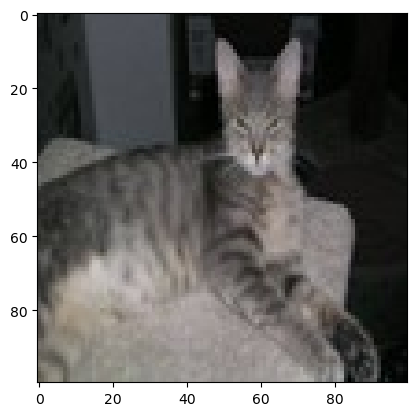

In [80]:
egs=random.randint(0,len(Y_test))
plt.imshow(X_test[egs, :])



pred=model.predict(X_test[egs, :].reshape(1,100,100,3))
pred=pred > 0.5
if(pred==0):
    pred='dog'
else:
    pred='cat'
print("The image is predicted to be a ",pred)